In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/national-stock-exchange-banking-sectors/NSE_BANKING_SECTOR.csv
/kaggle/input/nifty50-stocks-dataset/National_Stock_Exchange_of_India_Ltd.csv


In [3]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy as sp

In [4]:
df = pd.read_csv("/kaggle/input/national-stock-exchange-banking-sectors/NSE_BANKING_SECTOR.csv")
# df = pd.read_csv('/kaggle/input/nifty50-stocks-dataset/National_Stock_Exchange_of_India_Ltd.csv')
df

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-01-01,HDFC,EQ,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,8.508751e+13,13230,308262,0.4559
1,2016-01-04,HDFC,EQ,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,2.449371e+14,78529,1360507,0.6818
2,2016-01-05,HDFC,EQ,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,2.836464e+14,109820,1644980,0.7072
3,2016-01-06,HDFC,EQ,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,3.325286e+14,96546,2001431,0.7288
4,2016-01-07,HDFC,EQ,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,2.112055e+14,60151,1172564,0.6586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41226,2021-05-24,DHANBANK,EQ,14.30,14.40,14.70,14.35,14.55,14.55,14.52,1020364,1.481694e+12,1323,745223,0.7304
41227,2021-05-25,DHANBANK,EQ,14.55,14.60,17.45,14.40,16.55,16.60,16.67,16401581,2.734927e+13,15379,4777890,0.2913
41228,2021-05-26,DHANBANK,EQ,16.60,16.75,16.75,15.80,15.95,15.95,16.06,2267386,3.642436e+12,4812,1223263,0.5395
41229,2021-05-27,DHANBANK,EQ,15.95,15.95,16.10,15.35,15.75,15.60,15.74,1411225,2.221628e+12,2820,904246,0.6408


In [5]:
df.shape

(41231, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41231 entries, 0 to 41230
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                41231 non-null  object 
 1   SYMBOL              41231 non-null  object 
 2   SERIES              41231 non-null  object 
 3   PREV CLOSE          41231 non-null  float64
 4   OPEN                41231 non-null  float64
 5   HIGH                41231 non-null  float64
 6   LOW                 41231 non-null  float64
 7   LAST                41231 non-null  float64
 8   CLOSE               41231 non-null  float64
 9   VWAP                41231 non-null  float64
 10  VOLUME              41231 non-null  int64  
 11  TURNOVER            41231 non-null  float64
 12  TRADES              41231 non-null  int64  
 13  DELIVERABLE VOLUME  41231 non-null  int64  
 14  %DELIVERBLE         41231 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 4.7+

In [7]:
df.head()

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-01-01,HDFC,EQ,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,8.508751e+13,13230,308262,0.4559
1,2016-01-04,HDFC,EQ,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,2.449371e+14,78529,1360507,0.6818
2,2016-01-05,HDFC,EQ,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,2.836464e+14,109820,1644980,0.7072
3,2016-01-06,HDFC,EQ,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,3.325286e+14,96546,2001431,0.7288
4,2016-01-07,HDFC,EQ,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,2.112055e+14,60151,1172564,0.6586


In [8]:
df.isnull().sum()

DATE                  0
SYMBOL                0
SERIES                0
PREV CLOSE            0
OPEN                  0
HIGH                  0
LOW                   0
LAST                  0
CLOSE                 0
VWAP                  0
VOLUME                0
TURNOVER              0
TRADES                0
DELIVERABLE VOLUME    0
%DELIVERBLE           0
dtype: int64

In [9]:
df['SYMBOL'].value_counts() # Taking the count of values of different Banks.

SYMBOL
HDFC          1337
BANKINDIA     1337
KTKBANK       1337
J&KBANK       1337
SOUTHBANK     1337
DCBBANK       1337
KARURVYSYA    1337
PSB           1337
CENTRALBK     1337
CUB           1337
UCOBANK       1337
INDIANB       1337
MAHABANK      1337
ICICIBANK     1337
UNIONBANK     1337
FEDERALBNK    1337
CANBK         1337
IOB           1337
SBIN          1337
YESBANK       1337
KOTAKBANK     1337
AXISBANK      1337
IDBI          1337
INDUSINDBK    1337
BANKBARODA    1337
PNB           1337
DHANBANK      1297
RBLBANK       1173
AUBANK         962
BANDHANBNK     784
IDFCBANK       752
IDFCFIRSTB     585
CSBBANK        370
UJJIVANSFB     364
EQUITASBNK     141
SURYODAY        41
Name: count, dtype: int64

In [10]:
SBI = df[(df.SYMBOL == 'SBIN') & (df.DATE >= '2021-01-01')]  # Taking only SBI's data (ONLY 2021)
HDFC = df[(df.SYMBOL == 'HDFC') & (df.DATE >= '2021-01-01')] # Taking only HDFC's data (ONLY 2021)
# print(d['HIGH'])
# print(SBI)
HDFC
# ,'INDUSINDBK','IDBI','AXISBANK','KOTAKBANK','YESBANK','SBIN','ICICIBANK','HDFC'

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
1238,2021-01-01,HDFC,EQ,2558.65,2549.00,2593.30,2541.15,2565.00,2568.75,2574.95,2054108,5.289220e+14,77982,564766,0.2749
1239,2021-01-04,HDFC,EQ,2568.75,2576.90,2592.35,2533.15,2579.00,2578.50,2568.41,2795972,7.181188e+14,99023,1419319,0.5076
1240,2021-01-05,HDFC,EQ,2578.50,2589.00,2659.45,2572.40,2654.95,2651.85,2631.43,5870743,1.544844e+15,191487,3136561,0.5343
1241,2021-01-06,HDFC,EQ,2651.85,2664.70,2665.00,2619.00,2631.00,2638.85,2642.51,3401085,8.987386e+14,126726,1679728,0.4939
1242,2021-01-07,HDFC,EQ,2638.85,2670.00,2709.35,2647.40,2653.45,2661.35,2680.83,4106042,1.100758e+15,183933,2215445,0.5396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,2021-05-24,HDFC,EQ,2518.05,2515.00,2558.80,2515.00,2531.70,2540.90,2545.15,2655396,6.758374e+14,132449,1356421,0.5108
1333,2021-05-25,HDFC,EQ,2540.90,2562.00,2570.40,2523.50,2530.00,2530.50,2547.70,2641950,6.730908e+14,120573,1585453,0.6001
1334,2021-05-26,HDFC,EQ,2530.50,2547.00,2575.00,2530.50,2574.00,2567.55,2554.28,1839397,4.698340e+14,81682,934560,0.5081
1335,2021-05-27,HDFC,EQ,2567.55,2580.35,2580.35,2488.05,2494.95,2508.85,2515.84,14119786,3.552309e+15,201009,11258336,0.7973


In [11]:
fig = px.line(SBI, x="DATE", y="CLOSE",title='SBIN Every Day Close in 2021') 
fig.show() # plotting the daily close price of the sbi's stock in the year 2021

In [12]:
df['TRADES'].value_counts()
d1 = df[(df.TRADES >= 10000) & (df.DATE == '2021-01-01')] # taking the stocks which are having trade > 10000 in a day in 2021.

fig = px.bar(d1, x='SYMBOL', y='TRADES', title="No. of trades on 1st January 2021")
fig.show()    # Plotting the different trades of all the stocks which aree having trade more than 10000 daily in 2021.

In [13]:
d1['TRADES'].mean()

58292.608695652176

<Axes: xlabel='DATE', ylabel='CLOSE'>

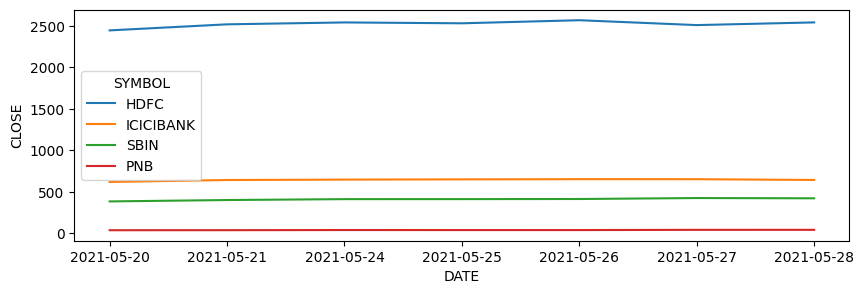

In [14]:
df_2021 = df[(df.DATE >= "2021-05-20") & ((df.SYMBOL =='HDFC') | (df.SYMBOL =='SBIN')|(df.SYMBOL =='PNB') | (df.SYMBOL =='ICICIBANK'))]
plt.figure(figsize=(10,3))
sns.lineplot(data=df_2021,x="DATE",y="CLOSE", hue = "SYMBOL") #Comparing the daily close of the stocks of SBI,PNB,HDFC,ICICI.

In [15]:
df_2021 = df_2021 = df[(df.DATE >= "2021-05-01") & ((df.SYMBOL =='HDFC') | (df.SYMBOL =='SBIN')|(df.SYMBOL =='PNB') | (df.SYMBOL =='ICICIBANK'))]
fig = px.bar(df_2021, x='DATE', y='TRADES', title="No. of trades in May 2021",hover_data = "SYMBOL")
fig.show() 

In [16]:
for i in df.columns[3:]:
    print(i)

PREV CLOSE
OPEN
HIGH
LOW
LAST
CLOSE
VWAP
VOLUME
TURNOVER
TRADES
DELIVERABLE VOLUME
%DELIVERBLE


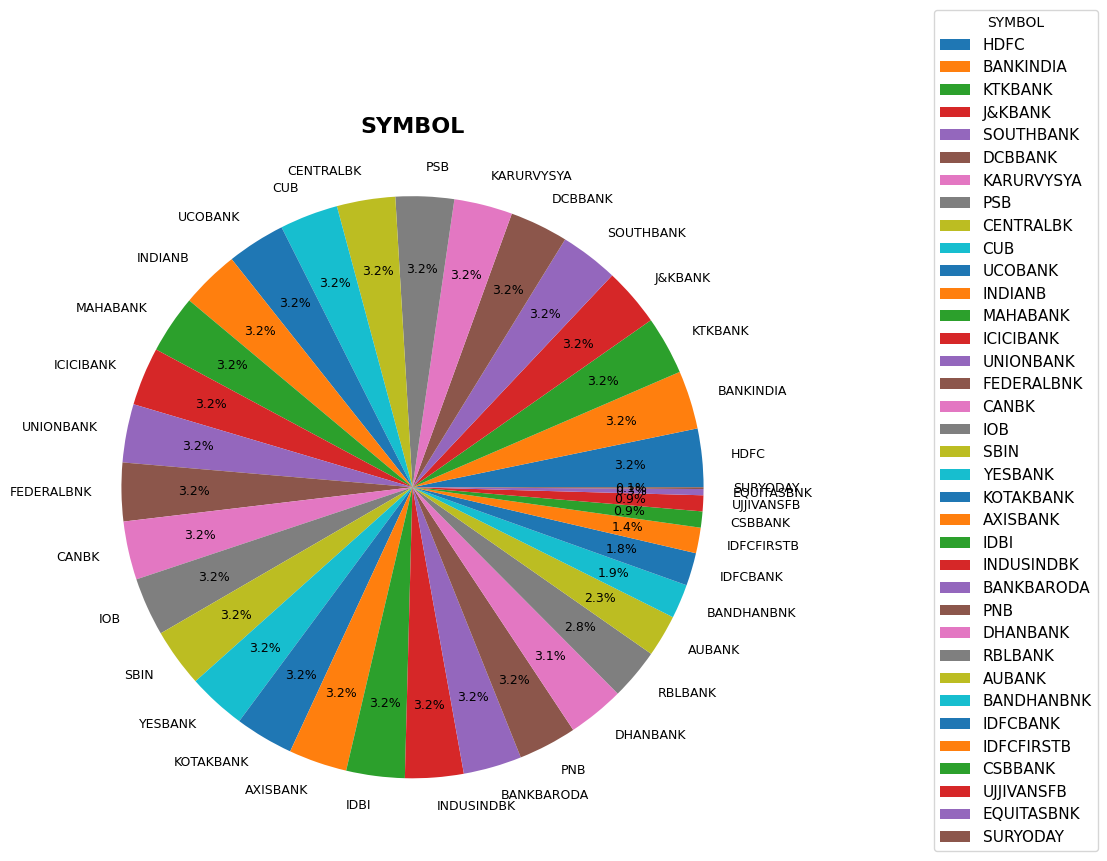

In [17]:
pie_ax=df['SYMBOL'].value_counts(normalize=True).plot.pie(figsize=(9,9),legend=True, autopct='%1.1f%%',
                                                          pctdistance=0.75, radius=1.05,wedgeprops = {'linewidth': 0.1},textprops = {'fontsize': 9})
pie_ax.set_title('SYMBOL', fontsize=16, weight='bold')
pie_ax.legend(fancybox=True, title='SYMBOL', fontsize=11,loc='upper right', bbox_to_anchor=(1.5, 1.2))
pie_ax.set_ylabel("")
plt.show()

In [18]:
for i in df.columns[3:]:
    print(f"{i}\t-{df[i].skew()}")  # Checking the skewness in the data of the different features(columns)

PREV CLOSE	-2.486035093902925
OPEN	-2.4862733615145975
HIGH	-2.4797932203375037
LOW	-2.4918352347566195
LAST	-2.486348093165274
CLOSE	-2.486259192454467
VWAP	-2.4849640772251127
VOLUME	-12.965941515012204
TURNOVER	-6.78818485847942
TRADES	-4.598922893752054
DELIVERABLE VOLUME	-27.443206566978784
%DELIVERBLE	-0.14606995077450433


/tmp/ipykernel_33/2403460334.py:8: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

/tmp/ipykernel_33/2403460334.py:13: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



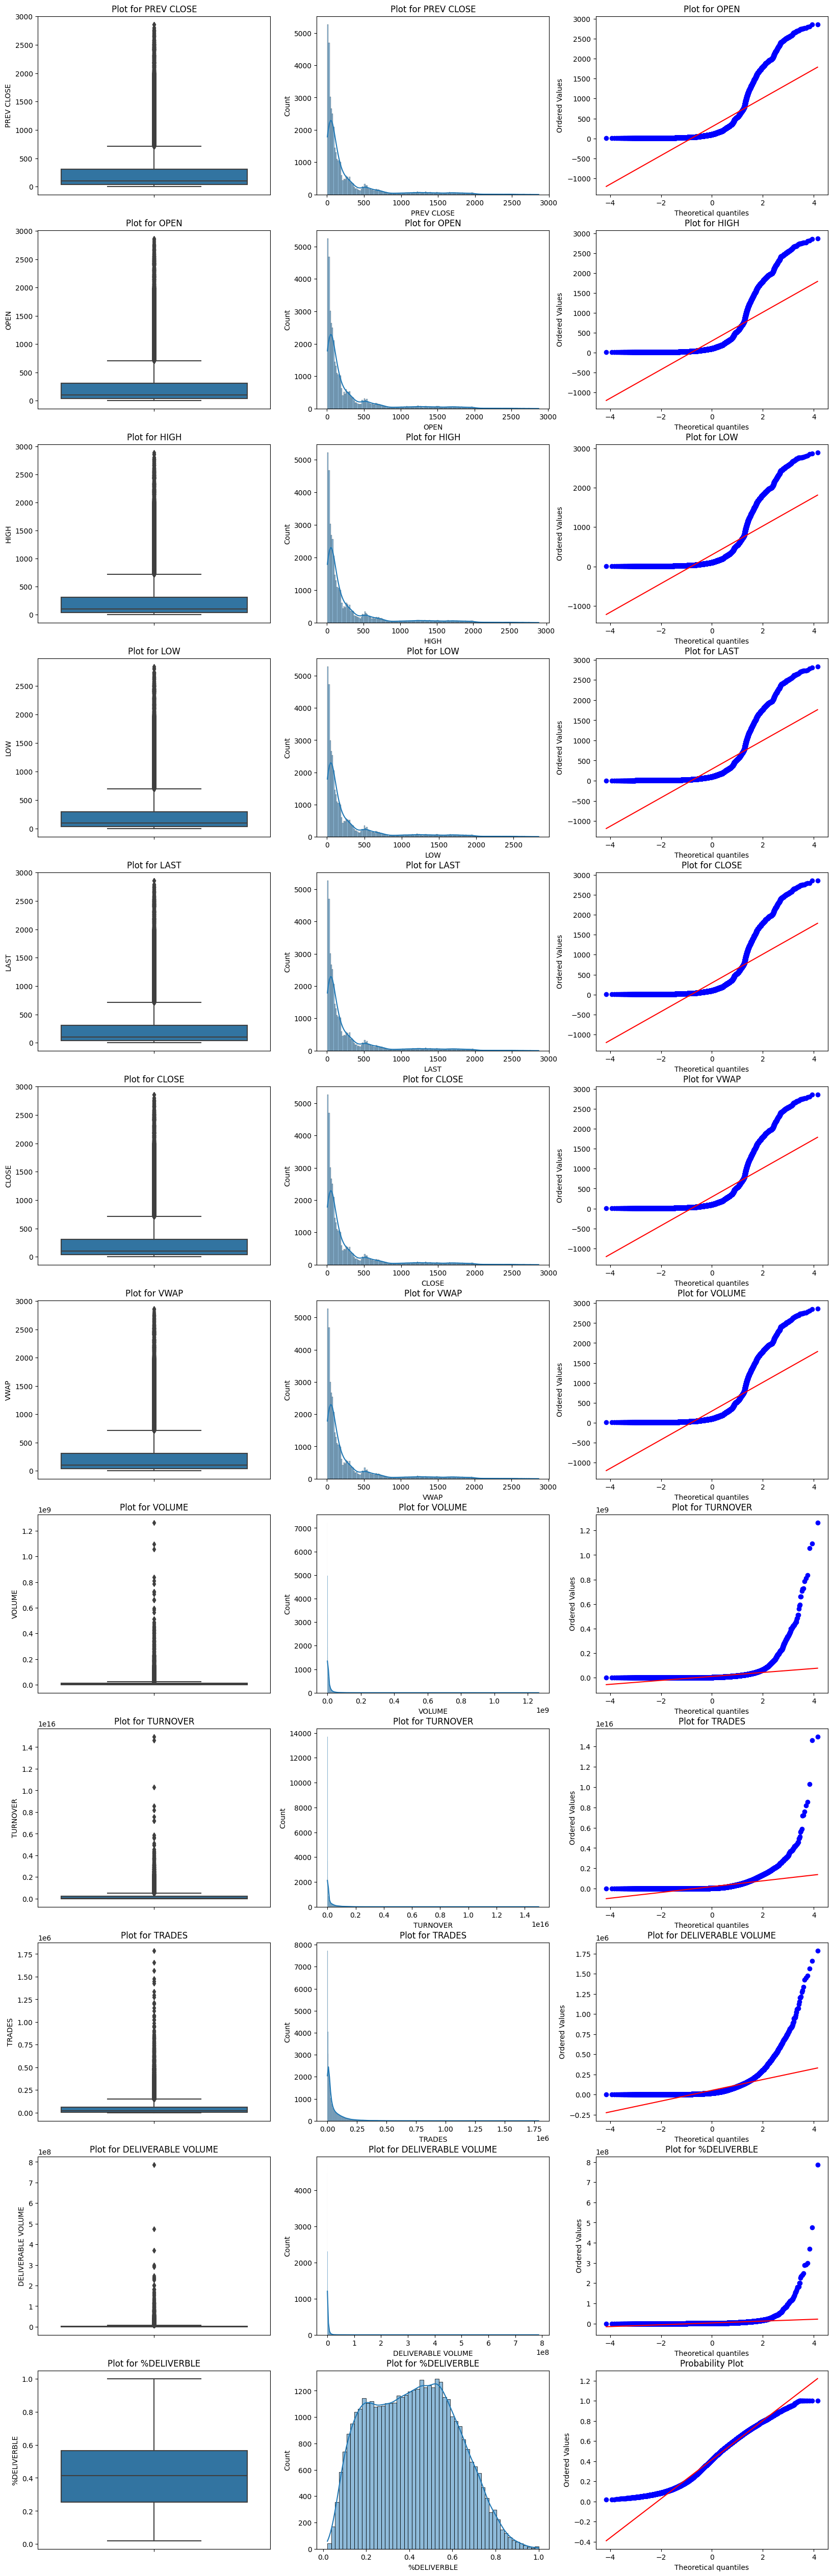

In [19]:
# PLOTTING the boxplot,histplot,probplot to see the skewness among the different columns.
fig,axes=plt.subplots(1,2,figsize=(20,70))
j = 1

for i in df.columns[3:]:

        plt.title("Plot for {}".format(i))
        plt.subplot(13,3,j)
        sns.boxplot(data= df, y = i)
        j += 1

        plt.title("Plot for {}".format(i))
        plt.subplot(13,3,j)
        sns.histplot(data = df, x = i, kde = True)
        j += 1

        plt.title("Plot for {}".format(i))
        plt.subplot(13,3,j)
        sp.stats.probplot(df[i], plot = plt)
        j += 1

plt.show() 

Date: date on which data is recorded

SYMBOL: Stock symbol according to NSE

SERIES: Different series in which a particular stock could be traded

PREV CLOSE: Previous day closing price

OPEN: Day's opening price

HIGH: Day's Highest Price

LOW: Day's Lowest Price

LAST: Day's Last Price

CLOSE: Day's Closing Price

VWAP: volume-weighted average price is the ratio of the value traded to total volume traded over a particular time horizon

Volume: the amount of a security that was traded during a given period of time. For every buyer, there is a seller, and each transaction contributes to the count of total volume.

Turnover: Total Turnover of the stock till that day

Trades: Number of buy or Sell of the stock.

Deliverable: Volume the quantity of shares which actually move from one set of people (who had those shares in their demat account before today and are selling today) to another set of people (who have purchased those shares and will get those shares by T+2 days in their demat account).

%Deliverble: percentage deliverables of that stock

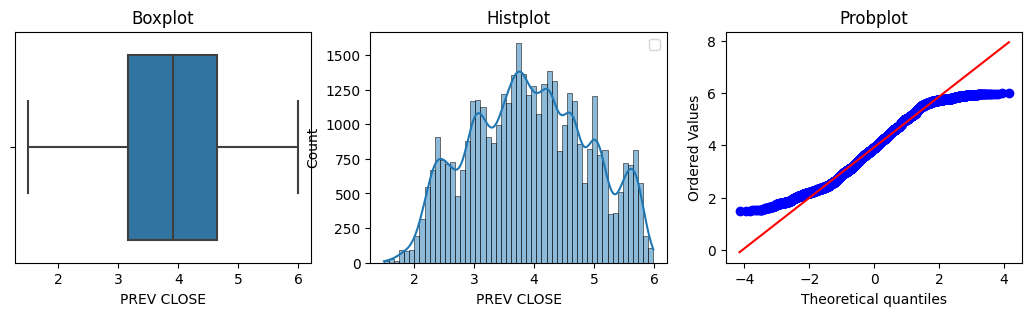

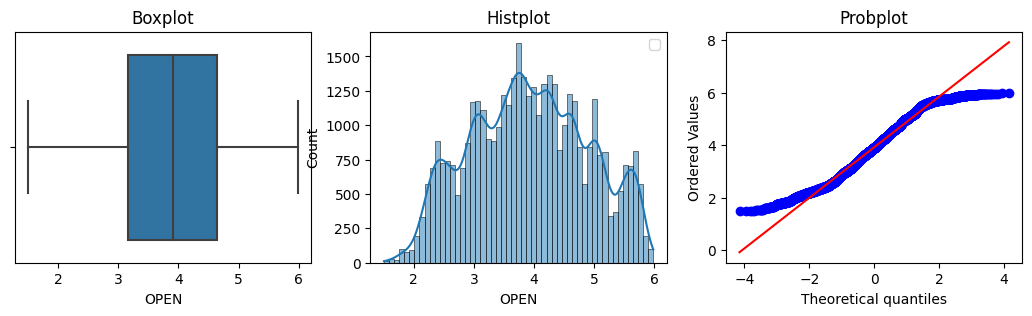

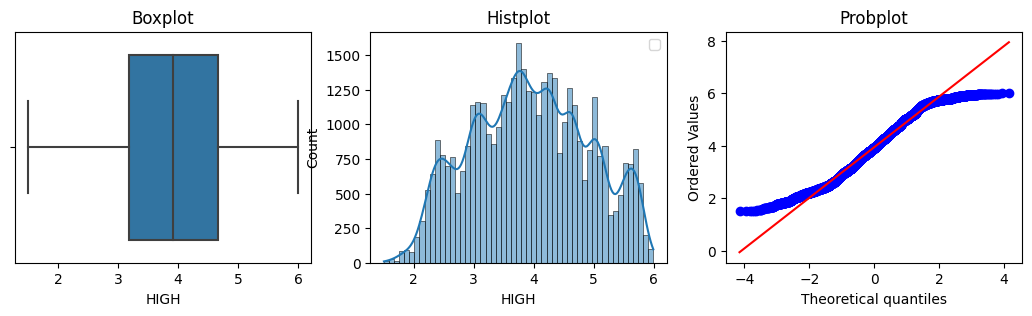

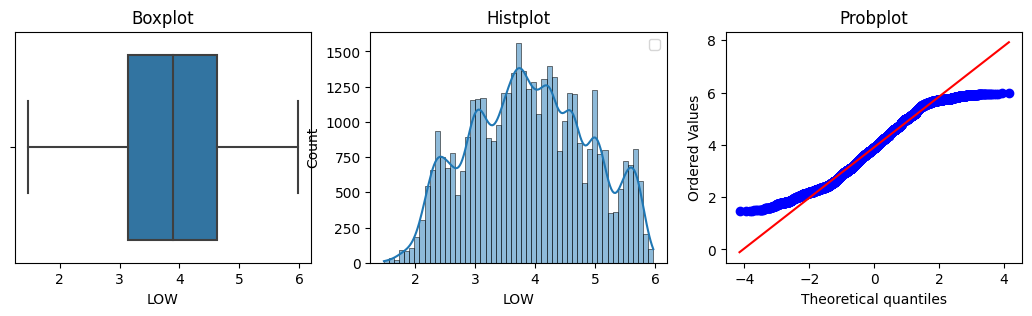

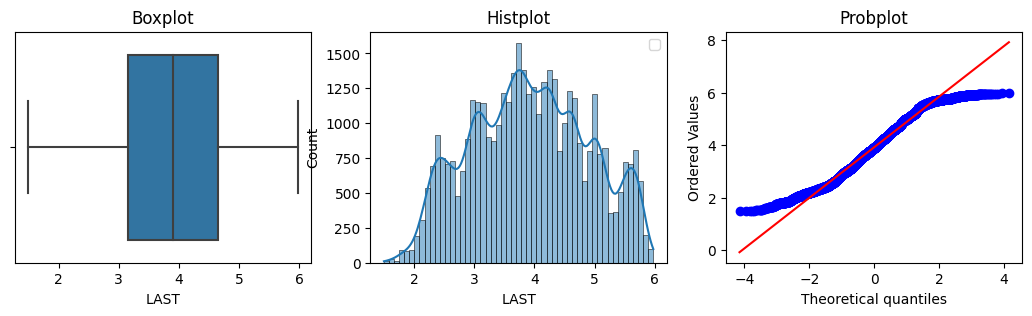

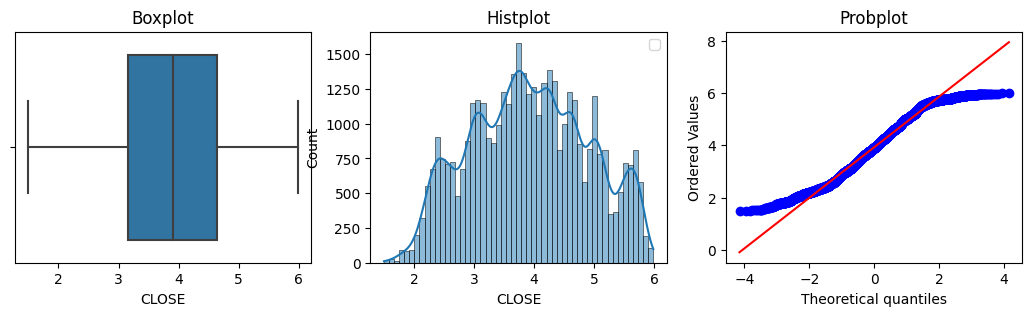

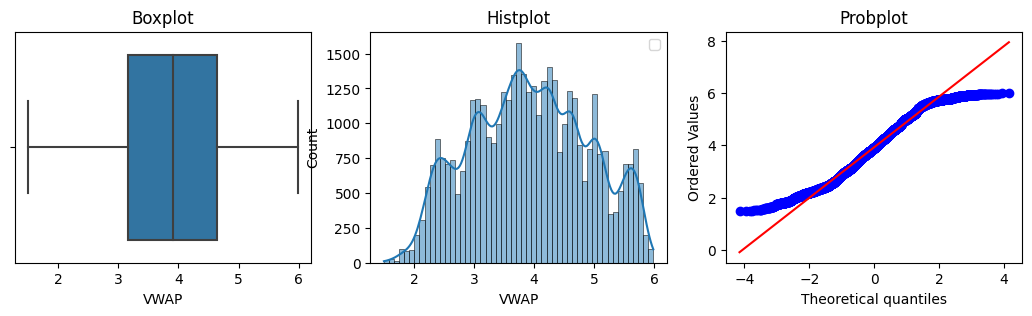

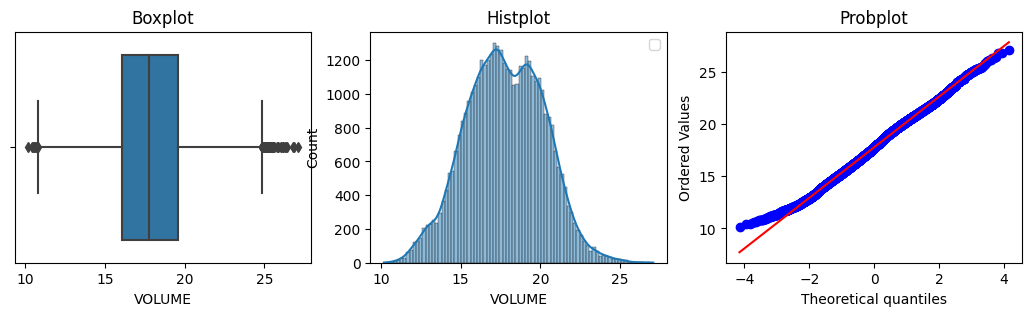

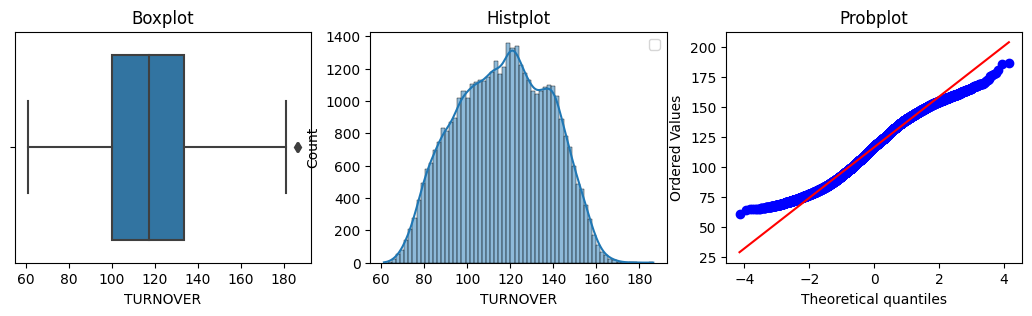

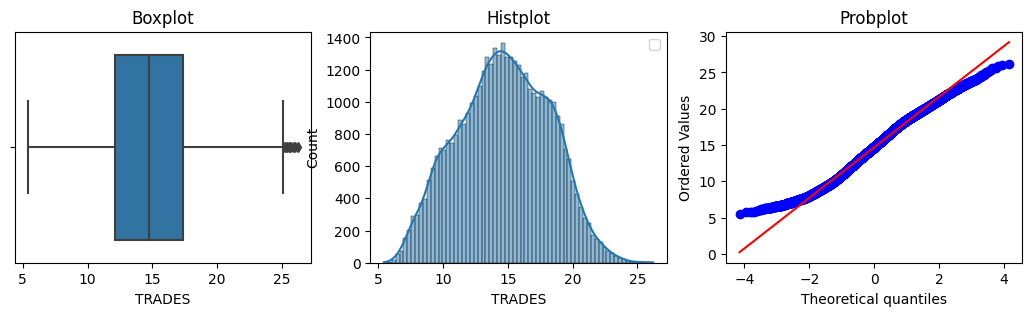

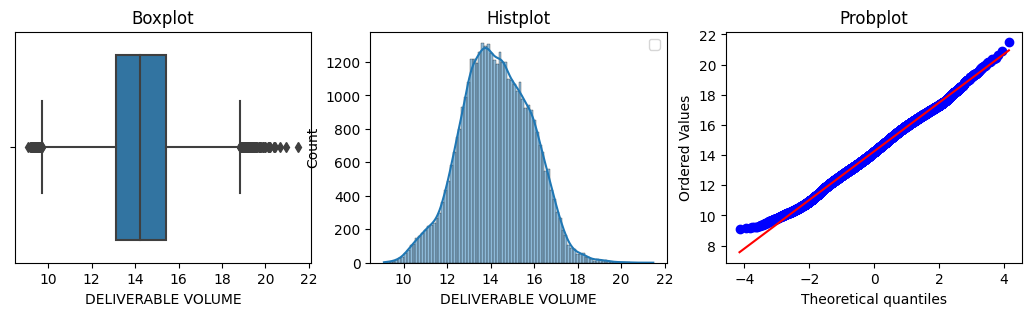

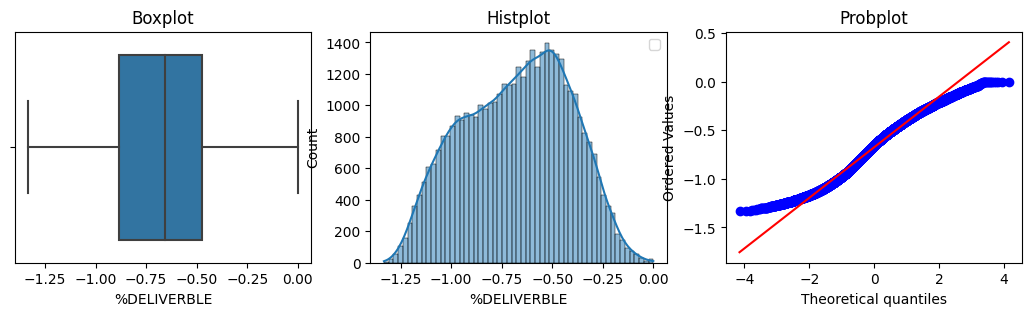

In [20]:
for col in df.columns[3:]:
    fig,axes=plt.subplots(1,3,figsize=(13,3))
    feat,lamb = sp.stats.boxcox(df[col])
    feat_boxcox = (((df[col]**lamb) - 1) / lamb)
    
    plt.title(col)
    sns.boxplot( x = feat_boxcox,ax=axes[0])
    axes[0].set_title('Boxplot')
    sns.histplot(x = feat_boxcox, kde = True,ax=axes[1])
    axes[1].set_title('Histplot')
    axes[1].legend()
    sp.stats.probplot(x=feat_boxcox, plot = axes[2])
    axes[2].set_title('Probplot')
    plt.show()

plt.show() 

In [21]:
df1 = df.iloc[:, 3:]
df1

,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,8.508751e+13,13230,308262,0.4559
1,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,2.449371e+14,78529,1360507,0.6818
2,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,2.836464e+14,109820,1644980,0.7072
3,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,3.325286e+14,96546,2001431,0.7288
4,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,2.112055e+14,60151,1172564,0.6586
...,...,...,...,...,...,...,...,...,...,...,...,...
41226,14.30,14.40,14.70,14.35,14.55,14.55,14.52,1020364,1.481694e+12,1323,745223,0.7304
41227,14.55,14.60,17.45,14.40,16.55,16.60,16.67,16401581,2.734927e+13,15379,4777890,0.2913
41228,16.60,16.75,16.75,15.80,15.95,15.95,16.06,2267386,3.642436e+12,4812,1223263,0.5395
41229,15.95,15.95,16.10,15.35,15.75,15.60,15.74,1411225,2.221628e+12,2820,904246,0.6408


<Axes: >

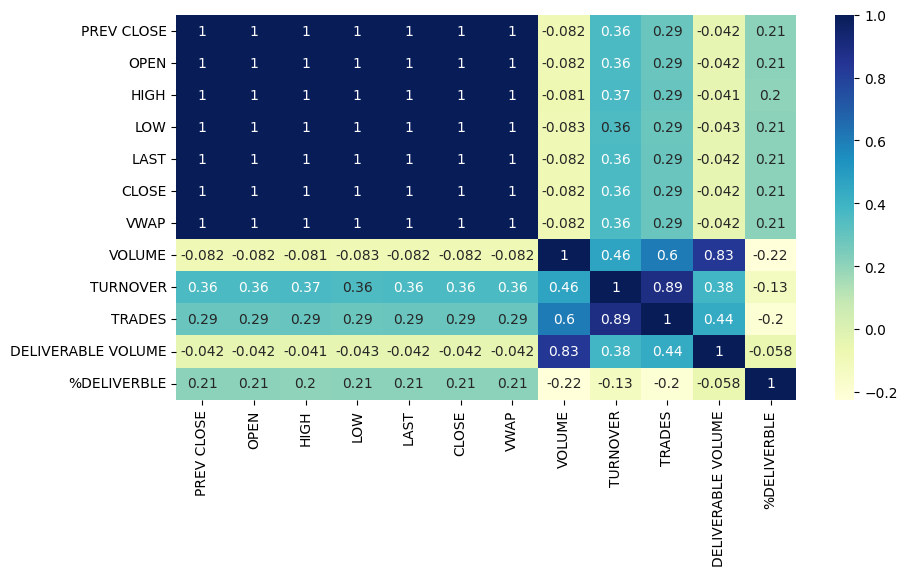

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True) 

# Testing Hypothesis

In [29]:
SBI = df[(df.SYMBOL == 'SBIN') & (df.DATE >= '2021-01-01')]  # Taking only SBI's data (ONLY 2021)

In [26]:
alpha = 0.5   # Setting the level of significance
m0 = 300000   # Setting the null hypothesis

z_cal = (SBI['TRADES'].mean() - m0)/(np.var(SBI['TRADES'])/(len(SBI['TRADES']))**0.5) # Calculating the z_cal
print(z_cal)

2.0463249345351912e-05


In [30]:
p = 2 * (1- sp.stats.norm.cdf(abs(z_cal)))   # calculating the p-value
print("p value : ",p)

p value :  0.9999836726892846


In [31]:
if p < alpha:
    print("Reject: The Average number of trades in a day in 2021 is not 300000.")
else:
    print("Do Not Reject: The Average number of trades in a day in 2021 is 300000. ")

Do Not Reject: The Average number of trades in a day in 2021 is 300000. 
